<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial123_various_pretrained_DL_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video link: https://youtu.be/7zw6Ok0SJwU

https://keras.io/api/applications/

Classify ImageNet classes with ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from matplotlib import pyplot as plt

model = ResNet50(weights='imagenet')

print(model.summary())

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/data/indian_elephant.JPG', target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

In [ ]:
preds.shape

(1, 1000)

The object in the image is:  tusker
with a confidence of  0.9388651


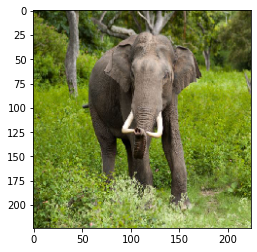

In [ ]:
plt.imshow(img)
final_prediction = decode_predictions(preds, top=5) #Can also look at top k results. 
print("The object in the image is: ", final_prediction[0][0][1])
print("with a confidence of ", final_prediction[0][0][2])

In [ ]:
final_prediction

-------------------------------------------------------------------------------

Classify ImageNet classes with VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet')
print(model.summary())


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/data/indian_elephant.JPG', target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

The object in the image is:  tusker
with a confidence of  0.7996925


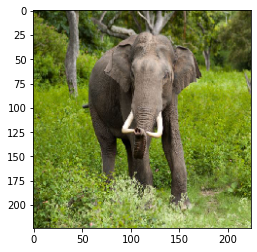

In [ ]:
plt.imshow(img)
final_prediction = decode_predictions(preds, top=5) #Can also look at top k results. 
print("The object in the image is: ", final_prediction[0][0][1])
print("with a confidence of ", final_prediction[0][0][2])

In [ ]:
final_prediction

[[('n01871265', 'tusker', 0.7996925),
  ('n02504013', 'Indian_elephant', 0.13271992),
  ('n02504458', 'African_elephant', 0.06758441),
  ('n02437312', 'Arabian_camel', 1.7528596e-06),
  ('n01704323', 'triceratops', 7.6453375e-07)]]

--------------------------------------------------------------------

Extract features with VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)  #Top means the dense layers. Here, we are only importing the convolutional layers. 

img = image.load_img('/content/drive/MyDrive/Colab Notebooks/data/indian_elephant.JPG', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
features.shape

(1, 7, 7, 512)

-------------------------------------------------------------------------------

Extract features from an arbitrary intermediate layer with VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block3_conv3').output) #Also try block3_conv3, block1_conv2

img = image.load_img('/content/drive/MyDrive/Colab Notebooks/data/indian_elephant.JPG', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [ ]:
features.shape

(1, 224, 224, 64)

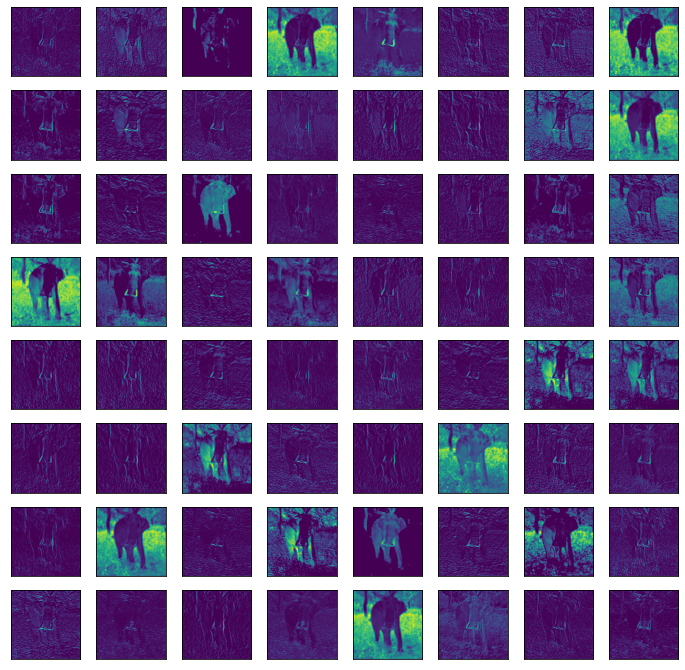

In [ ]:
square = 8
ix = 1
plt.figure(figsize=(12, 12))
for _ in range(square):
	for _ in range(square):
   
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(features[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

These pre-trained networks can be used as encoders for U-net to speed up training. Also, pre-trained networks can help with achieving better accuracy for smaller training datasets. 